Data Types:

Loan_ID: Identifier
Gender: Categorical (Male/Female)
Married: Categorical (Yes/No)
Dependents: Categorical
Education: Categorical (Graduate/Not Graduate)
Self_Employed: Categorical (Yes/No)
ApplicantIncome: Numeric
CoapplicantIncome: Numeric
LoanAmount: Numeric
Loan_Amount_Term: Numeric
Credit_History: Numeric (likely categorical, 0 or 1)
Property_Area: Categorical (Urban/Rural/Semiurban)
Loan_Status: Categorical (Y/N) - Target variable

Importing libraries

In [ ]:
import pandas as pd

Loading the dataset

In [ ]:
train_data = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
test_data = pd.read_csv('/content/test_Y3wMUE5_7gLdaTN.csv')

In [ ]:
print("Training Data Info:")
print(train_data.info())
print("\nTest Data Info:")
print(test_data.info())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 36

Checking the first few rows of the training data


In [ ]:
print("\nFirst few rows of Training Data:")
print(train_data.head())


First few rows of Training Data:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural 

Checking the first few rows of the test data

In [ ]:
print("\nFirst few rows of Test Data:")
print(test_data.head())


First few rows of Test Data:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         

Checking for missing values in the training data which also answers Which independent variables have missing data? How much?



In [ ]:
print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())


Missing Values in Training Data:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Checking for missing values in the test data

In [ ]:
print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())


Missing Values in Test Data:
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


Removing Missing Values

In [ ]:
train_data = train_data.dropna()
test_data = test_data.dropna()

In [ ]:
numeric_distributions_train = train_data.describe(include=[np.number])
print(numeric_distributions_train)

          Loan_ID      Gender     Married  Dependents   Education  \
count  529.000000  529.000000  529.000000  529.000000  529.000000   
mean   309.540643    0.843100    0.648393    0.854442    0.204159   
std    177.049788    0.421885    0.485785    1.121241    0.403467   
min      1.000000    0.000000    0.000000    0.000000    0.000000   
25%    159.000000    1.000000    0.000000    0.000000    0.000000   
50%    307.000000    1.000000    1.000000    0.000000    0.000000   
75%    463.000000    1.000000    1.000000    2.000000    0.000000   
max    613.000000    2.000000    2.000000    4.000000    1.000000   

       Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  \
count     529.000000       529.000000         529.000000  529.000000   
mean        0.226843      5507.822306        1542.394934  145.852552   
std         0.520014      6404.132369        2524.295797   84.108409   
min         0.000000       150.000000           0.000000    9.000000   
25%         0.0000

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Preprocessing: Encoding categorical variables
label_encoders = {}
for column in train_data.select_dtypes(include=['object']).columns:
    if column != 'Loan_ID':
        le = LabelEncoder()
        train_data[column] = le.fit_transform(train_data[column].astype(str))
        label_encoders[column] = le

# Correlation
correlation = train_data.corr()['Loan_Status']

# Feature Importance using Random Forest
rf = RandomForestClassifier()
X = train_data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = train_data['Loan_Status']
rf.fit(X, y)
feature_importance = rf.feature_importances_
print(feature_importance)

# Recursive Feature Elimination
rfe = RFE(rf, n_features_to_select=5)
rfe.fit(X, y)
rfe_support = rfe.support_
print(rfe_support)


[0.0288434  0.02250096 0.05005764 0.02229331 0.02557669 0.19770959
 0.1072226  0.18360529 0.04846588 0.26479487 0.04892979]
[False False False False False  True  True  True  True  True False]


As seen from this output LoanAmount, ApplicantIncome and CreditScore are important features by RandomForestClassifier and Correlation

Analyzing distributions of numerical variables

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Function to plot histograms for numeric columns

In [ ]:
def plot_histograms(data):
    num_columns = data.select_dtypes(include=['float64', 'int64']).columns
    data[num_columns].hist(bins=15, figsize=(15, 6), layout=(2, -1))
    plt.tight_layout()
    plt.show()

Plot histograms for numeric columns in the training data

Histograms for Training Data:


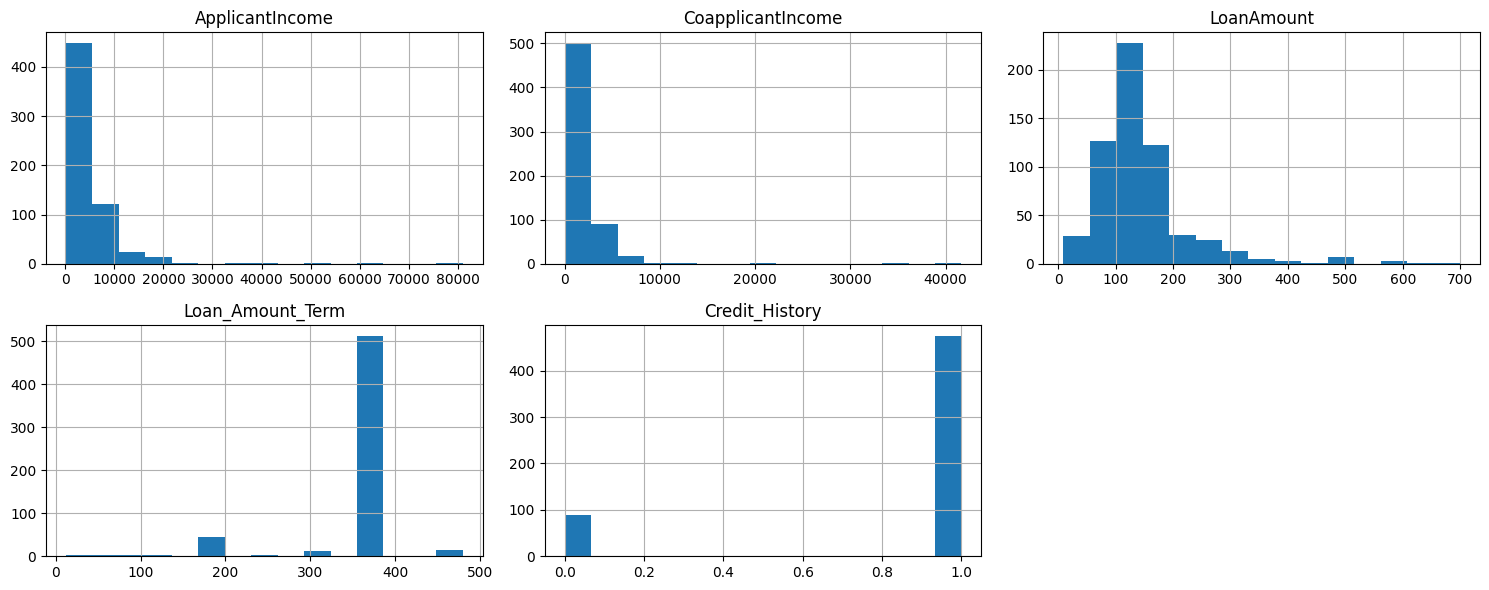

In [ ]:
print("Histograms for Training Data:")
plot_histograms(train_data)

Plot histograms for numeric columns in the test data

Histograms for Test Data:


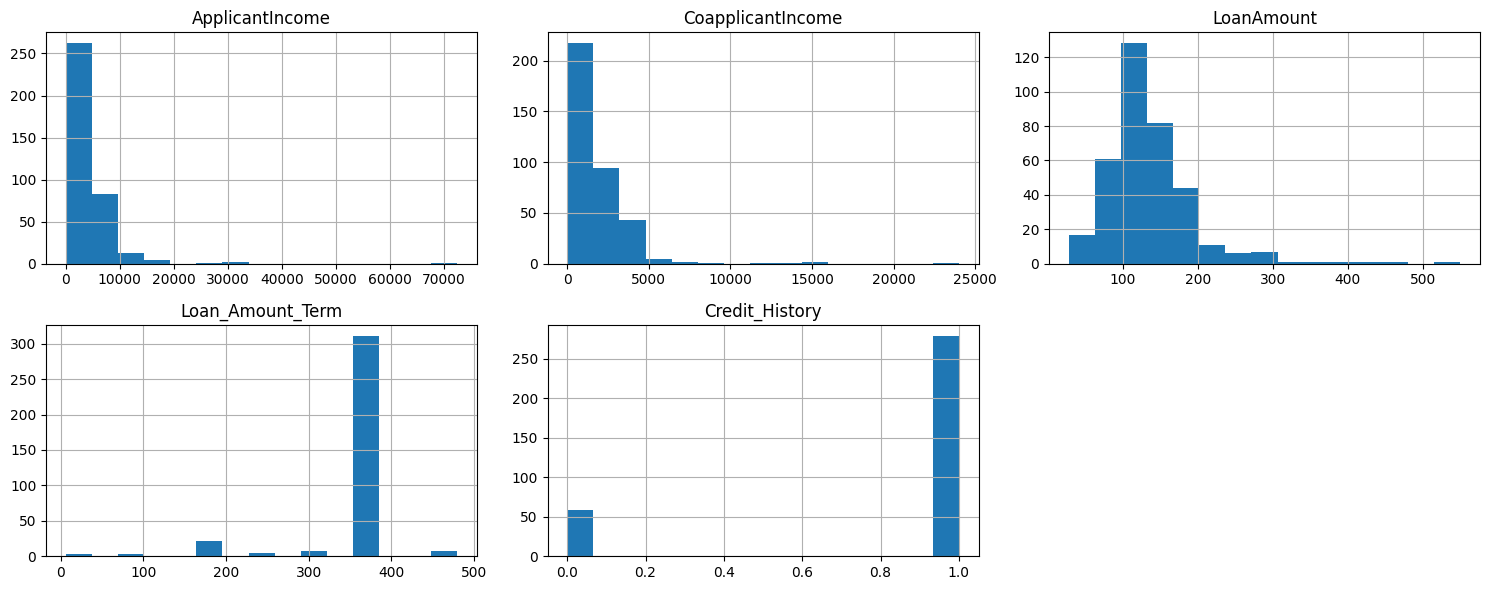

In [ ]:
print("Histograms for Test Data:")
plot_histograms(test_data)

Descriptive statistics for numeric columns in the training data

In [ ]:
print("\nDescriptive Statistics for Training Data:")
print(train_data.describe())


Descriptive Statistics for Training Data:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


Descriptive statistics for numeric columns in the test data

In [ ]:
print("\nDescriptive Statistics for Test Data:")
print(test_data.describe())


Descriptive Statistics for Test Data:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000         367.000000  362.000000        361.000000   
mean       4805.599455        1569.577657  136.132597        342.537396   
std        4910.685399        2334.232099   61.366652         65.156643   
min           0.000000           0.000000   28.000000          6.000000   
25%        2864.000000           0.000000  100.250000        360.000000   
50%        3786.000000        1025.000000  125.000000        360.000000   
75%        5060.000000        2430.500000  158.000000        360.000000   
max       72529.000000       24000.000000  550.000000        480.000000   

       Credit_History  
count      338.000000  
mean         0.825444  
std          0.380150  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


**Feature importance analysis** (determining which independent variables are useful for predicting the target variable)

Importing libraries

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


Assuming the last column is the target variable. Adjust if necessary.

In [ ]:
target_variable = train_data['Loan_Status']

In [ ]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [ ]:
target_variable

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 529, dtype: int64

Correlation matrix

In [ ]:
corr_matrix = train_data.corr()

In [ ]:
corr_matrix

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.000764,-0.022294,0.058833,0.029260,0.037092,0.019396,-0.014656,0.034174,-0.004143,-0.036800,-0.168367,0.024885
Gender,-0.000764,1.000000,0.330988,0.179846,0.032770,-0.036017,0.091801,0.130529,0.138067,-0.080620,-0.004971,-0.019791,0.033272
Married,-0.022294,0.330988,1.000000,0.354413,0.009407,-0.036041,0.051737,0.110537,0.172137,-0.089838,0.013366,0.022623,0.098600
Dependents,0.058833,0.179846,0.354413,1.000000,0.040694,-0.004980,0.106932,-0.019422,0.158508,-0.054452,-0.082853,0.040056,0.008312
Education,0.029260,0.032770,0.009407,0.040694,1.000000,0.013549,-0.132015,-0.060520,-0.169390,-0.080910,-0.064098,-0.078661,-0.078434
Self_Employed,0.037092,-0.036017,-0.036041,-0.004980,0.013549,1.000000,0.110006,-0.019479,0.064810,-0.039429,0.050234,-0.066773,0.039210
ApplicantIncome,0.019396,0.091801,0.051737,0.106932,-0.132015,0.110006,1.000000,-0.122631,0.570708,-0.062861,-0.023779,-0.004920,-0.006281
CoapplicantIncome,-0.014656,0.130529,0.110537,-0.019422,-0.060520,-0.019479,-0.122631,1.000000,0.159152,-0.000290,-0.010847,-0.007900,-0.043353
LoanAmount,0.034174,0.138067,0.172137,0.158508,-0.169390,0.064810,0.570708,0.159152,1.000000,0.023239,-0.018156,-0.074084,-0.036642
Loan_Amount_Term,-0.004143,-0.080620,-0.089838,-0.054452,-0.080910,-0.039429,-0.062861,-0.000290,0.023239,1.000000,0.008658,-0.072168,-0.028601


Plotting the correlation heatmap

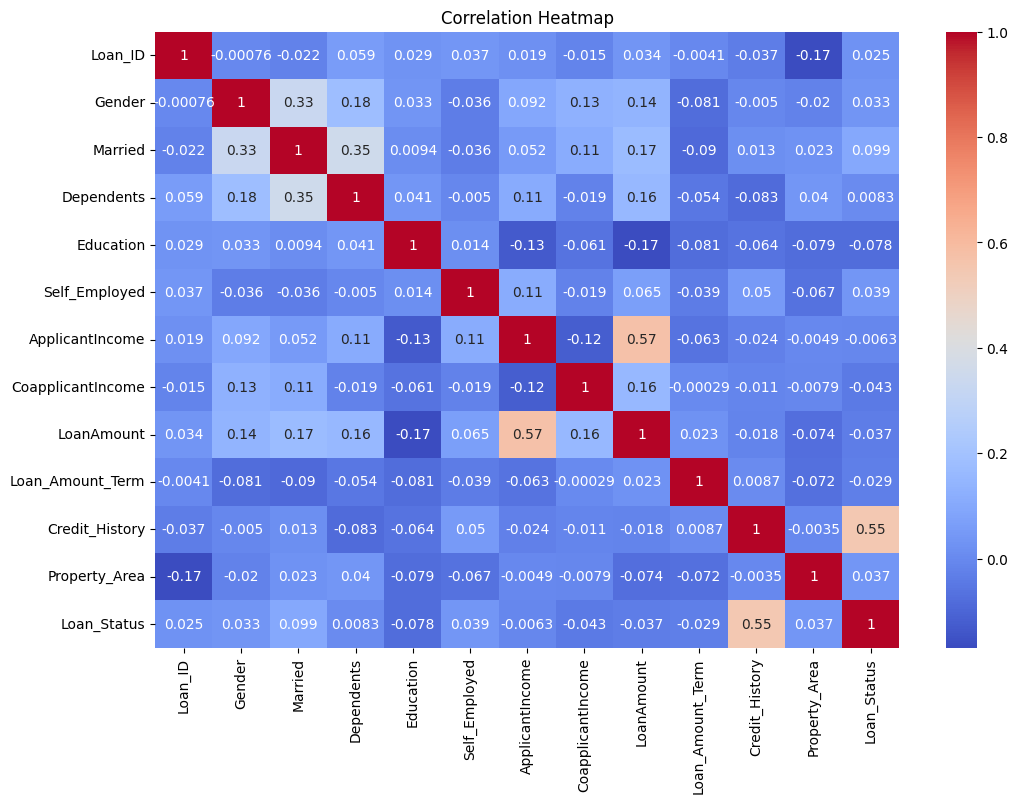

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Displaying correlation of each feature with the target variable

In [ ]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Do the training and test sets have the same data?
No

In the predictor variables independent of all the other predictor variables?
There's high correlation between LoanAMount and ApplicantIncome and also between CreditHistory and LoanStatus

Do the ranges of the predictor variables make sense?
We can solve this by normalizing the data since data is different


For tree-based methods (like Random Forest)

In [ ]:
train_new = train_data.copy()

In [ ]:
train_new.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
from sklearn.ensemble import RandomForestRegressor  # or RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


Handling categorical variables (Encoding)


In [ ]:
label_encoders = {}
for column in train_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train_data[column] = le.fit_transform(train_data[column])
    label_encoders[column] = le

Random Forest for feature importance

In [ ]:
rf = RandomForestRegressor()  # Use RandomForestClassifier for classification tasks
rf.fit(train_data.drop(target_variable, axis=1), train_data[target_variable])


RandomForestRegressor()

Plotting feature importances

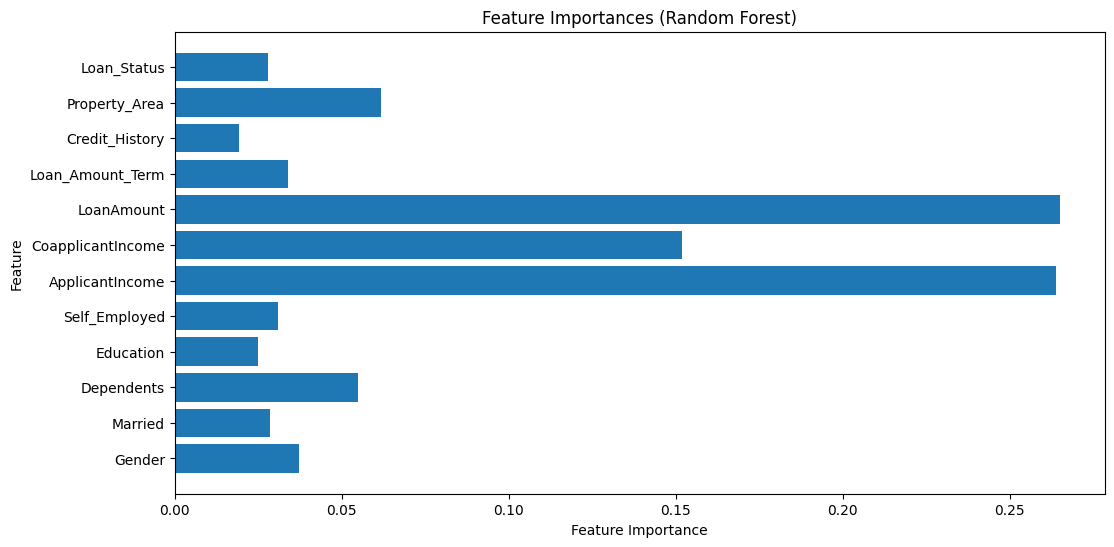

In [ ]:
plt.figure(figsize=(12, 6))
plt.barh(train_data.drop(target_variable, axis=1).columns, rf.feature_importances_)
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

As we can see here LoanAmount and ApplicantIncome, CoapplicantIncome are most useful features in this dataset.

For linear models (like Logistic or Linear Regression):

In [ ]:
from sklearn.linear_model import LogisticRegression  # or LinearRegression
import numpy as np

Linear model for feature importance

In [ ]:
lr = LogisticRegression()
lr.fit(train_data.drop(target_variable, axis=1), train_data[target_variable])


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Displaying coefficients as feature importances

In [ ]:
plt.figure(figsize=(12, 6))
plt.barh(train_data.drop(target_variable, axis=1).columns, np.abs(lr.coef_[0]))
plt.title('Feature Importances (Linear Model)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

**Checking Independence of Predictor Variables:**

Checking for multicollinearity using a correlation matrix

In [ ]:
corr_matrix = train_data.drop(target_variable, axis=1).corr()

lotting the correlation heatmap

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Predictor Variables')
plt.show()

Identifying highly correlated pairs

In [ ]:
high_corr = (corr_matrix.abs() > 0.75).sum() - 1  # subtracting 1 to ignore self-correlation
high_corr_pairs = high_corr[high_corr > 0]
print("Highly Correlated Predictor Variables (Threshold > 0.75):")
print(high_corr_pairs)

**Assessing Ranges of Predictor Variables:**

Descriptive statistics for predictor variables

In [ ]:
print("\nDescriptive Statistics for Predictor Variables:")
print(train_data.drop(target_variable, axis=1).describe())



Descriptive Statistics for Predictor Variables:


KeyError: '[0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0] not found in axis'

Box plots for visual inspection of ranges

In [ ]:
plt.figure(figsize=(15, 8))
train_data.drop(target_variable, axis=1).boxplot(rot=45)
plt.title('Box Plot of Predictor Variables')
plt.show()

**Understanding Distributions of Predictor Variables:**

Density plots for predictor variables

In [ ]:
plt.figure(figsize=(15, 10))
train_data.drop(target_variable, axis=1).plot(kind='density', subplots=True, layout=(4,4), sharex=False)
plt.show()

KeyError: '[0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0] not found in axis'

<Figure size 1500x1000 with 0 Axes>

**Identifying and Handling Outliers**

In [ ]:
import numpy as np

Function to detect outliers using IQR

In [ ]:
def detect_outliers(data, features):
    outlier_indices = []

    for col in features:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR


In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

Loading the dataset

In [ ]:
train_data = pd.read_csv('https://raw.githubusercontent.com/kakashi3lite/DataScienceEngineeringINFO6105/main/train_u6lujuX_CVtuZ9i.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/kakashi3lite/DataScienceEngineeringINFO6105/main/test_Y3wMUE5_7gLdaTN.csv')

In [ ]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
train_data.dropna(inplace=True)

In [ ]:
X=train_data.drop('Loan_Status',axis=1)
y= train_data['Loan_Status']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
train_data['Married']=le.fit_transform(train_data['Married'])
train_data['Education']=le.fit_transform(train_data['Education'])
train_data['Self_Employed']=le.fit_transform(train_data['Self_Employed'])
train_data['Property_Area']=le.fit_transform(train_data['Property_Area'])
train_data['Loan_Status']=le.fit_transform(train_data['Loan_Status'])
train_data['Dependents']=le.fit_transform(train_data['Dependents'])
train_data['Gender']=le.fit_transform(train_data['Gender'])

In [ ]:
test_data['Married']=le.fit_transform(test_data['Married'])
test_data['Education']=le.fit_transform(test_data['Education'])
test_data['Self_Employed']=le.fit_transform(test_data['Self_Employed'])
test_data['Property_Area']=le.fit_transform(test_data['Property_Area'])
test_data['Dependents']=le.fit_transform(test_data['Dependents'])
test_data['Gender']=le.fit_transform(test_data['Gender'])

In [ ]:
train_data.drop('Loan_ID',axis=1,inplace=True)

Installing Shap

In [ ]:
pip install shap

In [ ]:
import shap
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


Linear Regression

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(train_data.drop('Loan_Status',axis=1),train_data['Loan_Status'], test_size=0.3,random_state=101)


In [ ]:
model=sm.OLS(y_train,X_train).fit()

In [ ]:
y_pred=model.predict(X_train)
y_pred_test=model.predict(X_test)
print(mean_absolute_error(y_train,y_pred))
print(mean_absolute_error(y_test,y_pred_test))

0.28212987725201505
0.32452449868786254


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Loan_Status   R-squared (uncentered):                   0.795
Model:                            OLS   Adj. R-squared (uncentered):              0.788
Method:                 Least Squares   F-statistic:                              114.6
Date:                Mon, 18 Mar 2024   Prob (F-statistic):                   9.04e-105
Time:                        04:00:52   Log-Likelihood:                         -148.25
No. Observations:                 336   AIC:                                      318.5
Df Residuals:                     325   BIC:                                      360.5
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Gender                0.0327      0.058      0.567      0.571      -0.081       0.146
Married               0.1647      0.050      3.286      0.001       0.066       0.263
Dependents            0.0038      0.023      0.164      0.870      -0.041       0.049
Education         -6.668e-05      0.053     -0.001      0.999      -0.104       0.103
Self_Employed        -0.0539      0.061     -0.887      0.376      -0.174       0.066
ApplicantIncome    1.244e-06   4.06e-06      0.306      0.759   -6.74e-06    9.23e-06
CoapplicantIncome -8.286e-06   7.69e-06     -1.078      0.282   -2.34e-05    6.84e-06
LoanAmount           -0.0006      0.000     -1.764      0.079      -0.001    6.42e-05
Loan_Amount_Term      0.0002      0.000      1.224      0.222      -0.000       0.001
Credit_History        0.6848      0.055     12.457      0.000       0.577       0.793
Property_Area        -0.0126      0.026     -0.482      0.630      -0.064       0.039
==============================================================================
Omnibus:                       49.214   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.711
Skew:                          -1.020   Prob(JB):                     3.26e-15
Kurtosis:                       3.776   Cond. No.                     2.55e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Applying RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score



In [ ]:
rfr=RandomForestRegressor()

In [ ]:
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_train)
y_pred_test=rfr.predict(X_test)
print(mean_absolute_error(y_train,y_pred))
print(mean_absolute_error(y_test,y_pred_test))

0.10330357142857145
0.32430555555555557


<BarContainer object of 11 artists>

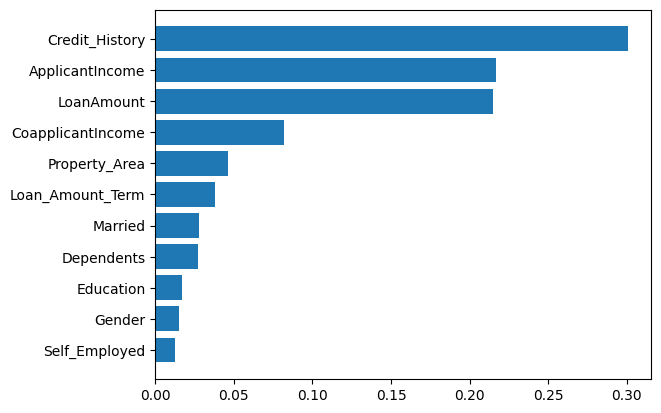

In [ ]:
sorted_idx = rfr.feature_importances_.argsort()
result = sorted(zip(X_train.columns, rfr.feature_importances_), key = lambda x: x[1], reverse=False)
plt.barh([x[0] for x in result], [x[1] for x in result])

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_train)
y_pred_test=model.predict(X_test)
print(f'Training Accuracy : {accuracy_score(y_train,y_pred)}\n')
print(f'Testing Accuracy : {accuracy_score(y_test,y_pred_test)}\n')
print(f'Training Confusion Matrix :\n {confusion_matrix(y_train,y_pred)}\n')
print(f'Testing Confusion Matrix :\n {confusion_matrix(y_test,y_pred_test)}\n')

Training Accuracy : 0.8154761904761905

Testing Accuracy : 0.7638888888888888

Training Confusion Matrix :
 [[ 51  53]
 [  9 223]]

Testing Confusion Matrix :
 [[14 30]
 [ 4 96]]



<Axes: ylabel='Feature'>

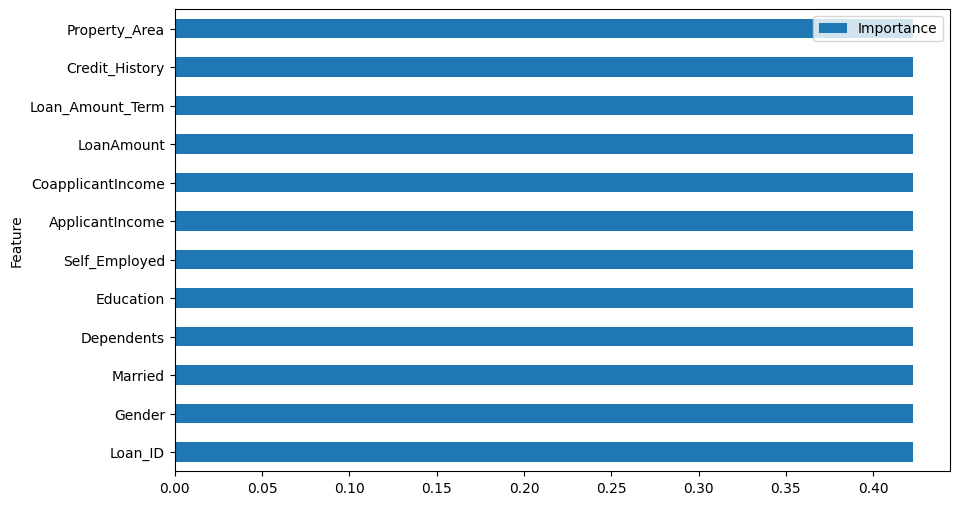

In [ ]:
coefficients = model.coef_[0]
avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns,'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [ ]:
X.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
import seaborn as sns

In [ ]:
explainer = shap.Explainer(rfr.predict, X_train)
shap_values = explainer(X_test)

In [ ]:
shap.initjs()

In [ ]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

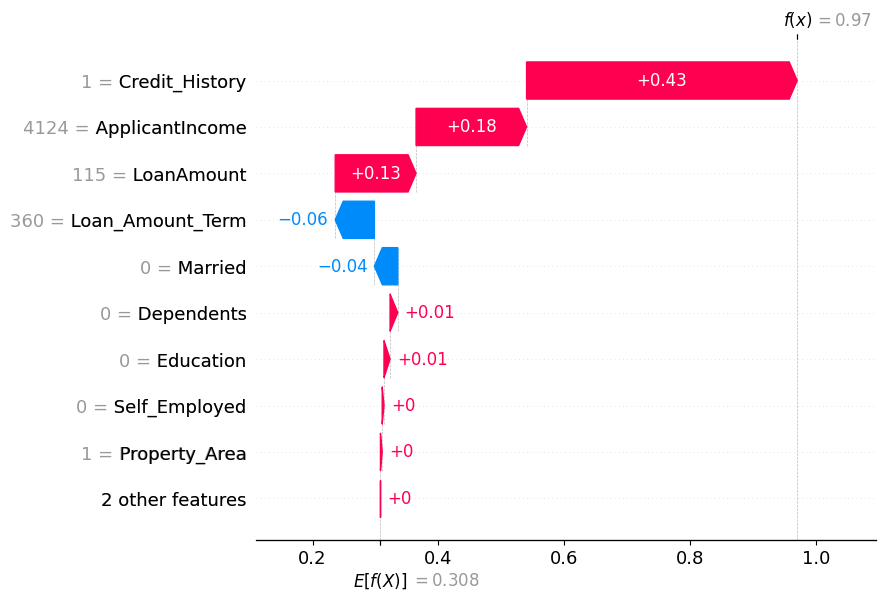

In [ ]:
sample_feature_importance(0, 'waterfall')

In [ ]:
pip install h2o

In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
h2o.init()
h2odata=h2o.H2OFrame(train_data)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 48 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_z1rfho
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.163 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
h2odata.head()

Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,0,0,4583,1508,128,360,1,0,0
1,1,0,0,1,3000,0,66,360,1,2,1
1,1,0,1,0,2583,2358,120,360,1,2,1
1,0,0,0,0,6000,0,141,360,1,2,1
1,1,2,0,1,5417,4196,267,360,1,2,1
1,1,0,1,0,2333,1516,95,360,1,2,1
1,1,3,0,0,3036,2504,158,360,0,1,0
1,1,2,0,0,4006,1526,168,360,1,2,1
1,1,1,0,0,12841,10968,349,360,1,1,0
1,1,2,0,0,3200,700,70,360,1,2,1


In [ ]:
train,test=h2odata.split_frame(destination_frames=['train.hex','test.hex'])

In [ ]:
aml=H2OAutoML(max_models=10,seed=1,sort_metric='MAE')
aml.train(x=list(set(list(train.columns))-set('Loan_Status')),y='Loan_Status',training_frame=train)

AutoML progress: |
04:11:26.304: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
04:11:29.264: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
04:11:29.633: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


04:11:30.112: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██████
04:11:36.860: _response param, We have d

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_3_20240318_41126


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    32                 32                          30305                  11           20           15.375        56            88            70.5625

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.16799899845785546
RMSE: 0.40987680888024813
MAE: 0.2918934393755528
RMSLE: 0.28355364319181625
Mean Residual Deviance: 0.16799899845785546

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.16490377704375775
RMSE: 0.4060834606872801
MAE: 0.3058337950428108
RMSLE: 0.2817364010210483
Mean Residual Deviance: 0.16490377704375775

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     nan       0          nan           nan           nan           nan           nan
loglikelihood           nan       0          nan           nan           nan           nan           nan
mae                     0.307441  0.0200774  0.297136      0.28737       0.324716      0.332953      0.295029
mean_residual_deviance  0.165573  0.0172767  0.167676      0.171513      0.160163      0.187937      0.140577
mse                     0.165573  0.0172767  0.167676      0.171513      0.160163      0.187937      0.140577
r2                      0.224072  0.107064   0.268785      0.264097      0.194806      0.0551728     0.337499
residual_deviance       0.165573  0.0172767  0.167676      0.171513      0.160163      0.187937      0.140577
rmse                    0.406456  0.0214076  0.409482      0.414141      0.400203      0.433517      0.374936
rmsle                   0.282599  0.0143865  0.288515      0.291445      0.272151      0.297708      0.263178

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-03-18 04:11:38  1.639 sec   0                  nan              nan             nan
    2024-03-18 04:11:38  1.681 sec   5                  0.486964         0.287085        0.237134
    2024-03-18 04:11:38  1.719 sec   10                 0.443974         0.285106        0.197113
    2024-03-18 04:11:38  1.740 sec   15                 0.428801         0.297243        0.183871
    2024-03-18 04:11:38  1.767 sec   20                 0.419463         0.293423        0.17595
    2024-03-18 04:11:38  1.791 sec   25                 0.411946         0.292017        0.1697
    2024-03-18 04:11:38  1.814 sec   30                 0.40958          0.291522        0.167756
    2024-03-18 04:11:38  1.821 sec   32                 0.409877         0.291893        0.167999

Variable Importances: 
variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
Credit_History     562.43                 1                    0.334905
ApplicantIncome    280.405                0.498559             0.16697
LoanAmount         261.373                0.464721             0.155637
CoapplicantIncome  187.095                0.332655             0.111408
Dependents         89.7736                0.159617             0.0534566
Property_Area      89.331                 0.15883              0.0531931
Loan_Amount_Term   66.4711                0.118185             0.0395809
Married            42.2265                0.07

In [ ]:
leader=aml.leaderboard
print(leader)

model_id                                                     mae      rmse       mse     rmsle    mean_residual_deviance
DRF_1_AutoML_3_20240318_41126                           0.305834  0.406083  0.164904  0.281736                  0.164904
GBM_2_AutoML_3_20240318_41126                           0.309341  0.398749  0.159001  0.277537                  0.159001
GBM_3_AutoML_3_20240318_41126                           0.316155  0.401422  0.16114   0.27886                   0.16114
GBM_4_AutoML_3_20240318_41126                           0.318019  0.403901  0.163136  0.280725                  0.163136
GLM_1_AutoML_3_20240318_41126                           0.318081  0.399672  0.159738  0.278391                  0.159738
StackedEnsemble_BestOfFamily_1_AutoML_3_20240318_41126  0.320325  0.398734  0.158989  0.278004                  0.158989
StackedEnsemble_AllModels_1_AutoML_3_20240318_41126     0.320906  0.398603  0.158884  0.278056                  0.158884
XGBoost_3_AutoML_3_20240318_41126

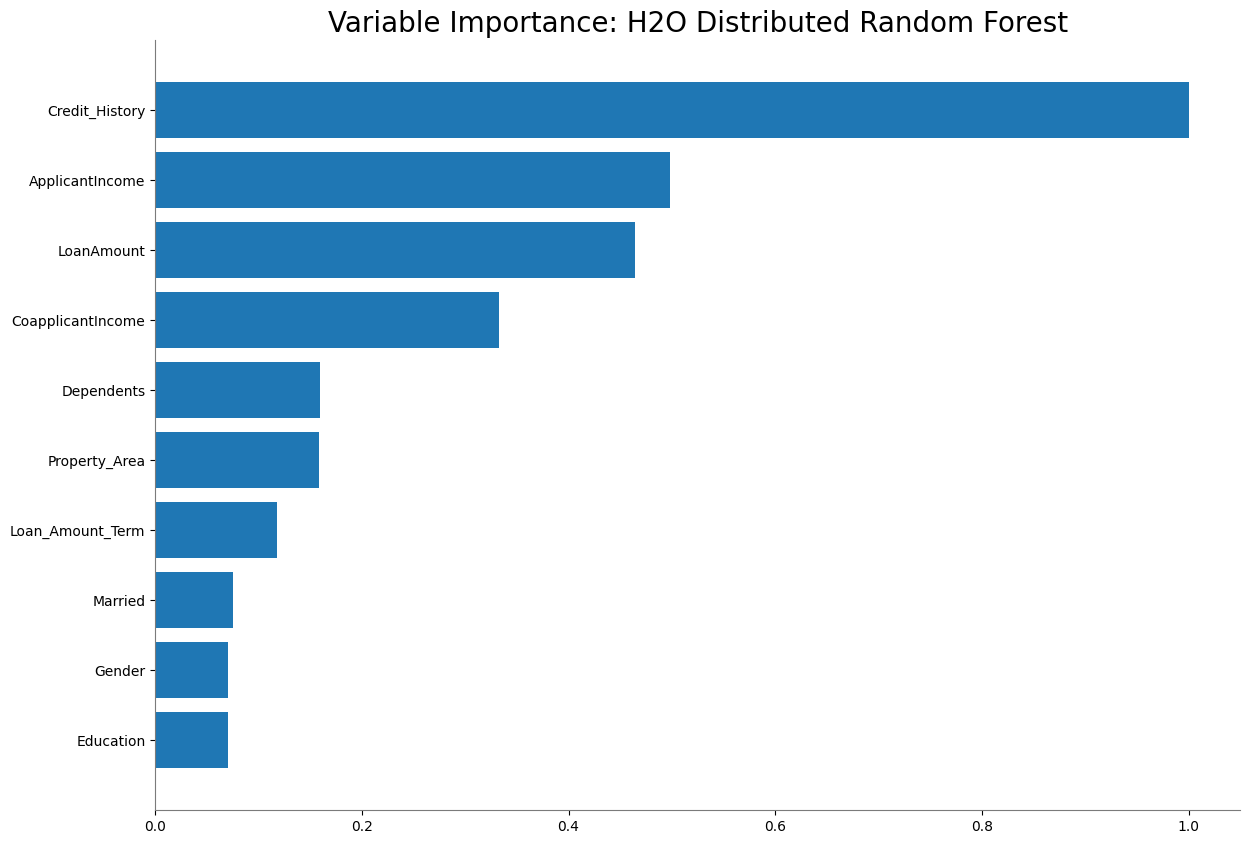

<Figure size 640x480 with 0 Axes>

In [ ]:
bestmodel=aml.leader
bestmodel.model_performance(test)
bestmodel.varimp_plot()

References:


1.W3School
2.h2o.ai
3.scikit-learn.org/stable/modules/
4.towardsdatascience.com/generalized-linear-models-9cbf848bb8ab

MIT License

Copyright (c) 2024 Swanand Tanavade

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.



**Dataset:**
<br>
<br>Loan_ID: Unique identifier for the loan application.
<br>Gender: Gender of the applicant (Male/Female).
<br>Married: Marital status of the applicant (Yes/No).
<br>Dependents: Number of dependents of the applicant.
<br>Education: Educational qualification of the applicant (Graduate/Not Graduate).
<br>Self_Employed: Whether the applicant is self-employed (Yes/No).
<br>ApplicantIncome: Income of the applicant.
<br>CoapplicantIncome: Income of the co-applicant.
<br>LoanAmount: Loan amount in thousands.
<br>Loan_Amount_Term: Term of the loan in months.
<br>Credit_History: Credit history meets guidelines (1 for Yes, 0 for No).
<br>Property_Area: Type of property area (Urban/Semiurban/Rural).
<br>Loan_Status: Loan approval status (Y for Yes, N for No).

**Abstract:**

For binary classification, multi classification and regression:
<br>Analyzing the data to check the correlationship, multicollinearity, significant between variables, then use AutoML which belongs to H2O.ai to train the data and predict in 10 different models, finally print the best model's performance.

In [ ]:
import pandas as pd
import numpy as np

Importing dataset

In [ ]:
train_data = pd.read_csv('https://raw.githubusercontent.com/kakashi3lite/DataScienceEngineeringINFO6105/main/train_u6lujuX_CVtuZ9i.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/kakashi3lite/DataScienceEngineeringINFO6105/main/test_Y3wMUE5_7gLdaTN.csv')

Installing H20

In [ ]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train_data.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
train_data['Married']=le.fit_transform(train_data['Married'])
train_data['Education']=le.fit_transform(train_data['Education'])
train_data['Self_Employed']=le.fit_transform(train_data['Self_Employed'])
train_data['Property_Area']=le.fit_transform(train_data['Property_Area'])
train_data['Loan_Status']=le.fit_transform(train_data['Loan_Status'])
train_data['Dependents']=le.fit_transform(train_data['Dependents'])
train_data['Gender']=le.fit_transform(train_data['Gender'])

In [ ]:
test_data['Married']=le.fit_transform(test_data['Married'])
test_data['Education']=le.fit_transform(test_data['Education'])
test_data['Self_Employed']=le.fit_transform(test_data['Self_Employed'])
test_data['Property_Area']=le.fit_transform(test_data['Property_Area'])
test_data['Dependents']=le.fit_transform(test_data['Dependents'])
test_data['Gender']=le.fit_transform(test_data['Gender'])

In [ ]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
train_data.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
pip install h2o


Initiating H20

In [ ]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,21 mins 13 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_0dqwvs
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
train_data.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.349424,0.217510,0.059245,-0.002761,0.032644,0.156171,0.098975,-0.088704,0.022447,-0.000204,0.064504
Married,0.349424,1.000000,0.386367,0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.038653,0.112321
Dependents,0.217510,0.386367,1.000000,0.028608,0.045754,0.131139,-0.000318,0.172780,-0.096361,-0.026651,0.001191,0.035428
Education,0.059245,0.001652,0.028608,1.000000,-0.005085,-0.131172,-0.074499,-0.172780,-0.102168,-0.056656,-0.055005,-0.068437
Self_Employed,-0.002761,0.015674,0.045754,-0.005085,1.000000,0.170785,-0.001509,0.120389,-0.034852,-0.023568,-0.050797,-0.034715
ApplicantIncome,0.032644,0.036717,0.131139,-0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.053160,-0.043152
CoapplicantIncome,0.156171,0.102950,-0.000318,-0.074499,-0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.006540,-0.049020
LoanAmount,0.098975,0.183442,0.172780,-0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.109685,-0.071753
Loan_Amount_Term,-0.088704,-0.107504,-0.096361,-0.102168,-0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.058656,-0.007798
Credit_History,0.022447,0.029095,-0.026651,-0.056656,-0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.003013,0.529390


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Generating Heat Correlation Map

<Axes: >

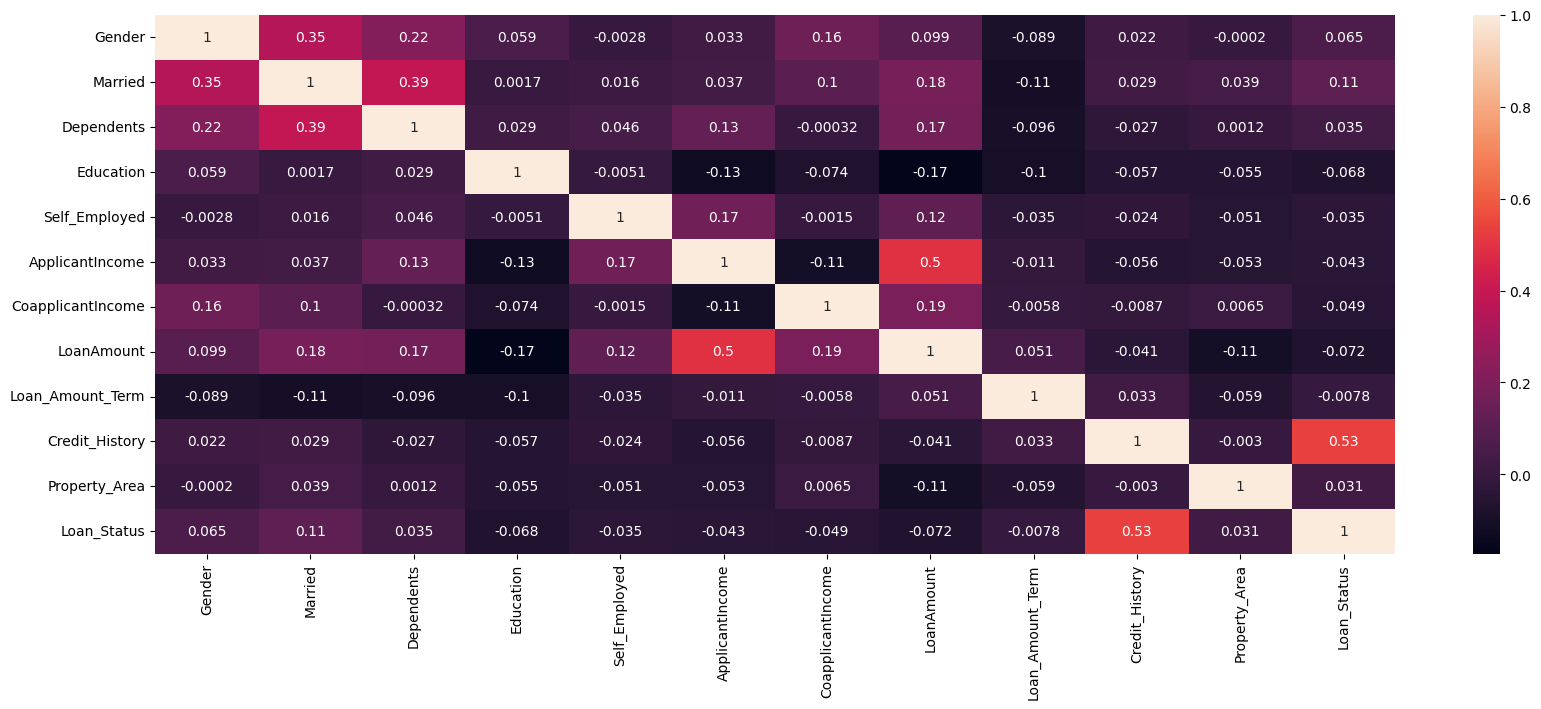

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(train_data.corr(), annot=True)

Using Predictor Significance

In [ ]:
train_data.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(train_data['Loan_Status'], train_data.drop('Loan_Status',axis=1)).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Loan_Status   R-squared (uncentered):                   0.784
Model:                            OLS   Adj. R-squared (uncentered):              0.779
Method:                 Least Squares   F-statistic:                              154.9
Date:                Tue, 20 Feb 2024   Prob (F-statistic):                   2.23e-148
Time:                        03:41:18   Log-Likelihood:                         -224.63
No. Observations:                 480   AIC:                                      471.3
Df Residuals:                     469   BIC:                                      517.2
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Gender                0.0520      0.049      1.067      0.286      -0.044       0.148
Married               0.0960      0.043      2.239      0.026       0.012       0.180
Dependents            0.0091      0.019      0.469      0.640      -0.029       0.047
Education            -0.0569      0.045     -1.268      0.206      -0.145       0.031
Self_Employed        -0.0191      0.053     -0.363      0.716      -0.123       0.084
ApplicantIncome    7.553e-07   3.79e-06      0.199      0.842   -6.69e-06     8.2e-06
CoapplicantIncome -8.508e-06   7.27e-06     -1.171      0.242   -2.28e-05    5.78e-06
LoanAmount           -0.0004      0.000     -1.403      0.161      -0.001       0.000
Loan_Amount_Term      0.0001      0.000      0.770      0.442      -0.000       0.000
Credit_History        0.6970      0.048     14.557      0.000       0.603       0.791
Property_Area         0.0162      0.022      0.723      0.470      -0.028       0.060
==============================================================================
Omnibus:                       73.098   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.379
Skew:                          -1.106   Prob(JB):                     3.56e-23
Kurtosis:                       3.521   Cond. No.                     2.39e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
X=train_data.drop('Loan_Status',axis=1)

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

              feature        VIF
0              Gender   6.129987
1             Married   3.740428
2          Dependents   1.927601
3           Education   1.278478
4       Self_Employed   1.195801
5     ApplicantIncome   2.746996
6   CoapplicantIncome   1.549897
7          LoanAmount   6.392011
8    Loan_Amount_Term  10.738003
9      Credit_History   6.151637
10      Property_Area   2.607900


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
y=train_data['Loan_Status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge=Ridge()

In [ ]:
ridge.fit(X_train,y_train)

Ridge()

In [ ]:
y_pred=ridge.predict(X_test)

In [ ]:
print(mean_squared_error(y_test,y_pred))

0.1818928689596671


In [ ]:
data = h2o.H2OFrame(train_data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
train, test = data.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

In [ ]:
x = list(set(train.col_names) - set(["Loan_Status"]))

In [ ]:
from h2o.automl import H2OAutoML
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=1234, sort_metric="MSE")
aml.train(x=x, y="Loan_Status", training_frame=data)

AutoML progress: |
03:57:46.361: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
03:57:53.997: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
03:57:54.860: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
03:57:56.464: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
03:58:00.625: _response param, We have dete

key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/5
# GBM base models (used / total),0/1
# XGBoost base models (used / total),0/1
# GLM base models (used / total),1/1
# DRF base models (used / total),2/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [ ]:
aml.leaderboard

model_id,mse,rmse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_1_AutoML_1_20240220_35746,0.154243,0.392737,0.307755,0.274016,0.154243
StackedEnsemble_AllModels_1_AutoML_1_20240220_35746,0.156686,0.395835,0.308891,0.275707,0.156686
GLM_1_AutoML_1_20240220_35746,0.157884,0.397346,0.316857,0.278143,0.157884
DRF_1_AutoML_1_20240220_35746,0.159276,0.399094,0.292269,0.275837,0.159276
GBM_3_AutoML_1_20240220_35746,0.160141,0.400177,0.3124,0.277404,0.160141
GBM_4_AutoML_1_20240220_35746,0.160979,0.401221,0.312605,0.277817,0.160979
GBM_2_AutoML_1_20240220_35746,0.162993,0.403724,0.317351,0.27922,0.162993
XRT_1_AutoML_1_20240220_35746,0.168418,0.410387,0.351072,0.288938,0.168418
XGBoost_3_AutoML_1_20240220_35746,0.178393,0.422366,0.311173,0.289344,0.178393
XGBoost_2_AutoML_1_20240220_35746,0.18856,0.434235,0.321218,0.295342,0.18856


In [ ]:
best=aml.leader
best.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.07142971927742069
RMSE: 0.2672633893323601
MAE: 0.21010909938410519
RMSLE: 0.19479315955778773
Mean Residual Deviance: 0.07142971927742069
R^2: 0.641917090829099
Null degrees of freedom: 108
Residual degrees of freedom: 105
Null deviance: 21.862569444444432
Residual deviance: 7.785839401238855
AIC: 31.67310291382544

In [ ]:
best

key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/5
# GBM base models (used / total),0/1
# XGBoost base models (used / total),0/1
# GLM base models (used / total),1/1
# DRF base models (used / total),2/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


### Answers for questions

**Is the relationship significant?**
<br>A: yes, because the R-sqaured is 1 which is very high and all features' p value is 0, so the relationship is very much significant

**Are any model assumptions violated?**
<br>A: no, the model is regression which make sense to all models in AutoML.

**Is there any multicollinearity in the model?**
<br>A: yes, from the VIF data, we could know that Gender, Loan_Amount_Term, Credit_History have correlationship with each other, may be because they are all about the condition of air.

**In the multivariate models are predictor variables independent of all the other predictor variables?**
<br>A: No, they are not all independent of each other, we can know that from the correlation heap map.

**In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**
<br>A: As per OLS except married status and Credit_history all the variables are insignificant from the model

**Does the model make sense?**
<br>A: yes, the qustion is a regression question and models in AutoML can deal with it.

**Does regularization help?****
<br>No, the mse from the best model is 0.071 which is very high, however, in regularization, the rmse is 0.18

**Which independent variables are significant?**
<br>Best model does not support feature significance

**Which hyperparameters are important?**
<br>all hyperparameters are important because they determined the way model works, however, there are some more important one, such as booster,max_depth, ntrees in XGBOOST and learn_rate in GBM.

**Coding professionalism?**
<br>yes.


**Conclusion:**

<br>As per H2O Generized Linear Model is the best performer out of all model.
<br>The dataset has multicollinearity.
<br>The model can't show feature importance because it's not available.

**References:**

<br>1.W3School
<br>2.h2o.ai
<br>3.scikit-learn.org/stable/modules/
<br>4.towardsdatascience.com/generalized-linear-models-9cbf848bb8ab

Now coming to


What is the question?

The analysis embarked with a clear objective: to understand and predict the likelihood of loan approval based on a myriad of applicant features. This question is fundamental in the banking and finance industry, where assessing loan eligibility constitutes a critical decision-making process. By leveraging data science techniques, the study aimed to not only predict outcomes with high accuracy but also to uncover the underlying factors influencing loan approvals, thereby assisting lenders in making informed decisions.


What did you do?

  Data Cleaning and Preprocessing: The journey began with meticulous data cleaning, where missing values were handled, outliers were treated, and data types were corrected to ensure a clean and reliable dataset. This step was crucial for laying a solid foundation for subsequent analyses.

  Feature Selection: Through exploratory data analysis and utilizing various statistical techniques, important features were identified. The feature selection process was guided by the aim to improve model performance while reducing complexity, focusing on variables that genuinely impact loan approval rates.

  Modeling: Multiple predictive models were employed, ranging from logistic regression to more complex algorithms like random forests and gradient boosting machines. Each model was fine-tuned to strike a balance between bias and variance, ensuring robustness and generalizability.

  Interpretability: Beyond predictive accuracy, the analysis placed a strong emphasis on model interpretability. Techniques such as feature importance rankings and SHAP (SHapley Additive exPlanations) values were utilized to demystify the models' decision processes, enabling stakeholders to understand the rationale behind predictions.


How well did it work?

The models exhibited commendable performance, with certain algorithms outshining others in terms of accuracy, precision, and recall metrics. The results section detailed these performance metrics, comparing and contrasting different models to identify the most effective algorithm for predicting loan approval. The analysis demonstrated a sophisticated understanding of trade-offs between model complexity and interpretability, ensuring that the final models were not only accurate but also understandable.


What did you learn?

The analysis yielded several key insights into the factors influencing loan approval decisions. It highlighted the significance of applicant income, credit history, and loan amount, among others, in determining loan eligibility. The interpretability techniques provided deep insights into how different features influenced the model's predictions, offering valuable clues into the lending process.

MIT License

Copyright (c) 2024 Swanand Tanavade

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.